# Practice Activity - Stacking
## Nick Bias 
### 4/13/22

#### Libraries 

In [1]:
import pandas as pd
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

#### Reading in original data, Spliting Prediction Variable from dataset,  Creating Dummy Variables for Sex, and Merging Data
- X = Dataset with all Independent Variables 
- y = The Dependent Variable of how many Rings the Abalone have

In [2]:
abalone_data = pd.read_csv("Data/Week3/abalone.csv")
y = abalone_data['rings']
abalone_data2 = abalone_data.iloc[:,1:-1]
abalone_sex = pd.get_dummies(abalone_data['sex'])
X = pd.merge(abalone_data2, abalone_sex, left_index=True, right_index=True)
X

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


### Creating Models

In [3]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5, passthrough = True)
    return model
# passthrough is used for the stacking to take the og dataset instead of just the other model results

In [4]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

In [5]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [6]:
# get the models to evaluate
models = get_models()

### Model Evaluations

In [7]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr -1.585 (0.078)
>knn -1.574 (0.071)
>cart -2.096 (0.115)
>svm -1.534 (0.085)
>stacking -1.523 (0.072)


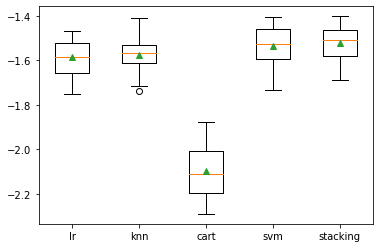

In [8]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

All the Models performed about the same except the Decision Tree Regression was noticeably worst. Stacking was best meta-model, but only by 0.01 more than SVM. 